In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
host = "http://127.0.0.1:8081"
mac_addresses = []

# A:get all macs
response = requests.get(host+"/devices")
if response.status_code == 200:
    objs=response.json()['mac_addresses']
    for obj in objs:
        mac_addresses.append(obj)
    
else:
    print("The server is offline")
    exit()

In [5]:
print(mac_addresses)
fromtime = 1622505600000
totime   = 1707734538000

['0x86ac561e351']


          Datetime  Labels
0    1684142441000       7
1    1684142445000       5
2    1684142449000       7
3    1684142453000       5
4    1684142458000       5
..             ...     ...
294  1684165915000       5
295  1684165919000       5
296  1684165923000       5
297  1684165927000       5
298  1684165931000       5

[299 rows x 2 columns]


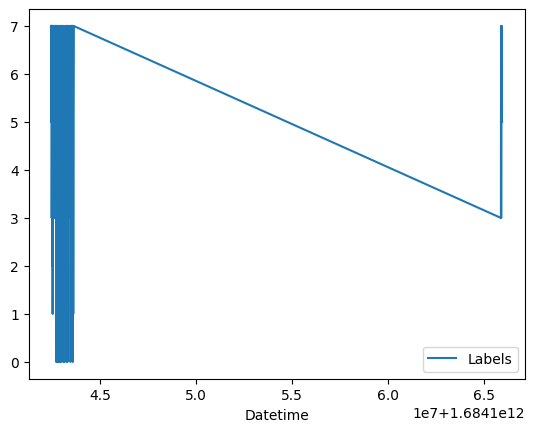

In [6]:
for mac_address in mac_addresses:
    request_path = host+"/device/"+ mac_address + f"?fromtime={fromtime}&totime={totime}"
    response = requests.get(request_path)
    mac_address_details_in_string = str(response.content.decode())
    mac_address_details_in_json = json.loads(mac_address_details_in_string)

    mac_address   = mac_address_details_in_json["mac_address"]
    mac_address_x = mac_address_details_in_json["timestamps"]
    mac_address_l = mac_address_details_in_json["labels"]
    
    dictio = {"Datetime": mac_address_x, "Labels":mac_address_l}
    

    df_battery = pd.DataFrame(dictio, columns=['Datetime', 'Labels'])
    df_battery = df_battery.astype({"Datetime": int, "Labels": int})
    df_battery.plot(x='Datetime', y='Labels')
    
    print(df_battery)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

label_names = {
    0.0: 'Change Language',
    1.0: 'Activate Music',
    2.0: 'Deactivate Lights',
    3.0: 'Increase Volume',
    4.0: 'Decrease Volume',
    5.0: 'Increase Heat',
    6.0: 'Decrease Heat',
    7.0: 'Noise'
}

df_battery['Labels'] = df_battery['Labels'].astype(int)
df_battery['Labels'] = df_battery['Labels'].map(label_names)
print(df_battery)

          Datetime         Labels
0    1684142441000          Noise
1    1684142445000  Increase Heat
2    1684142449000          Noise
3    1684142453000  Increase Heat
4    1684142458000  Increase Heat
..             ...            ...
294  1684165915000  Increase Heat
295  1684165919000  Increase Heat
296  1684165923000  Increase Heat
297  1684165927000  Increase Heat
298  1684165931000  Increase Heat

[299 rows x 2 columns]


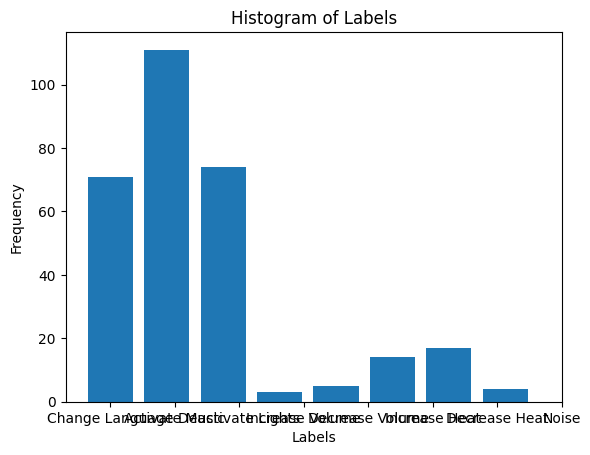

In [8]:
plt.hist(df_battery['Labels'], bins=8, rwidth=0.8, align='left')
plt.xticks(list(label_names.keys()), list(label_names.values()))
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Labels')
plt.show()

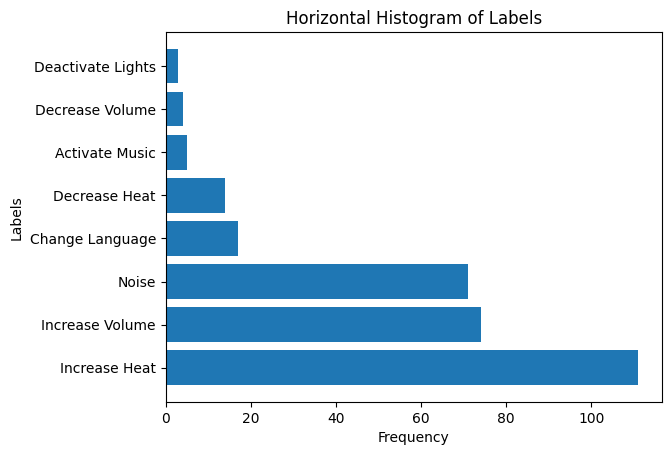

In [9]:
label_counts = df_battery['Labels'].value_counts()

plt.barh(label_counts.index, label_counts.values)

plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.title('Horizontal Histogram of Labels')

plt.show()